# Tutorial ElegantRun class - Basic

In [1]:
import pandas as pd
import numpy as np

from pyelegantsdds.elegantrun import ElegantRun
from pyelegantsdds.sdds import SDDS

from matplotlib import pyplot as plt

%matplotlib notebook

In [2]:
# path to singularity container with parallel elegant installed
sif = "PATH_TO_SIF_ELEGANT"

## Generate FODO lattice to use in examples

In [3]:
# lattice element definitions
elements ={
    "QF": {"type" : "KQUAD", "L": 0.342, "K1":  0.4900, "N_KICKS": 16},
    "QD": {"type" : "KQUAD", "L": 0.668, "K1": -0.4999, "N_KICKS": 16},
    "D":  {"type" : "DRIF" , "L": 3.5805},
    "W1": {"type" : "WATCH", "filename":"\"%s-%03ld.w1\"","mode": "coordinates"}
}

FODOstr = "! FODO cell.\n\n"
stringlist = ["{:6}: {}".format(k,", ".join(["{}={:15.12f}".format(kk,vv) 
                if not isinstance(vv,str)
                else "{}={}".format(kk,vv)
                if kk!="type" else "{}".format(vv) for kk,vv in v.items()])) 
              for k,v in elements.items()]

line     = ["W1","QF","D","QD","D","QF"]
linestr  = "{:6}: LINE=({})".format("FODO",",".join(line))
FODOstr += "\n".join(stringlist)
FODOstr += "\n\n"
FODOstr += linestr

print(FODOstr)

with open("FODO.lte","w") as f:
    f.write(FODOstr)
    
# set lattice for the rest of the tutorial
lattice = "FODO.lte"

! FODO cell.

QF    : KQUAD, L= 0.342000000000, K1= 0.490000000000, N_KICKS=16.000000000000
QD    : KQUAD, L= 0.668000000000, K1=-0.499900000000, N_KICKS=16.000000000000
D     : DRIF, L= 3.580500000000
W1    : WATCH, filename="%s-%03ld.w1", mode=coordinates

FODO  : LINE=(W1,QF,D,QD,D,QF)


## ElegantRun

The ElegantRun class is used to setup, control and run the Elegant simulations.

In [4]:
# load Elegant similator
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)

The *kwargs* argument is used to extract the settings for the simulations and building of the Elegant command file (temp.ele) - minimum required arguments are:
* use_beamline
* energy

Most command have default argument that can be changed by use of the *kwargs*, in this way simple simulations can be set up quickly and in just a few lines of python code. More complicated examples, using *kwargs* can be found in the **advanced tutorials**.

In [5]:
er.kwargs

{'use_beamline': 'FODO', 'energy': 1700.0}

The *parallel* argument allows to choose between running **serial** or **parallel** Elegant.

In [6]:
er.parallel

True

The latticefile used in the simulations is saved in the *lattice* property.

In [7]:
er.lattice

'FODO.lte'

## Properties

In [8]:
er.__dict__

{'sif': '/home/mti/gitlab-hzb/containers/bin/pelegant.sif',
 'lattice': 'FODO.lte',
 'parallel': True,
 'kwargs': {'use_beamline': 'FODO', 'energy': 1700.0},
 'commandfile': <pyelegantsdds.elegant_command.ElegantCommandFile at 0x7f640117f9d0>,
 'pelegant': 'run_pelegant.sh',
 'exec': 'bash run_pelegant.sh'}

The class contains a property **commandfile** that is an instance of the ElegantCommandFile class (see the specific tutorial for more details on this class).

## Methods

In [9]:
from types import FunctionType
[x for x, y in ElegantRun.__dict__.items() if (type(y) == FunctionType) and not x.startswith('_')]

['check',
 'clearCommands',
 'clearCommandHistory',
 'clearAll',
 'run',
 'add_basic_setup',
 'add_basic_twiss',
 'add_vary_element',
 'add_vary_element_from_file',
 'add_basic_controls',
 'add_watch',
 'add_watch_at_start',
 'add_fma_command',
 'add_DA_command',
 'findtwiss',
 'find_matrices',
 'generate_sdds_particle_inputfile',
 'simple_single_particle_track',
 'track_simple',
 'track_vary',
 'fma',
 'dynap',
 'dynapmom',
 'table_scan']

## Commands - Basic

Most commands are designed to generate template command files that can be used by a single simulation command by providing a minimal of arguments through the *kwargs* argument.

In [10]:
# should always be used first
er.add_basic_setup()
er.commandfile.commandlist, er.commandfile.history

([{'NAME': 'run_setup',
   'NOTE': '',
   'lattice': 'FODO.lte',
   'use_beamline': 'FODO',
   'p_central_mev': 1700.0,
   'default_order': 1,
   'concat_order': 3,
   'rootname': 'temp',
   'parameters': '%s.params',
   'semaphore_file': '%s.done',
   'magnets': '%s.mag'}],
 {})

Let us add now some basic twiss.

In [11]:
er.add_basic_twiss()
er.commandfile.commandlist, er.commandfile.history

([{'NAME': 'run_setup',
   'NOTE': '',
   'lattice': 'FODO.lte',
   'use_beamline': 'FODO',
   'p_central_mev': 1700.0,
   'default_order': 1,
   'concat_order': 3,
   'rootname': 'temp',
   'parameters': '%s.params',
   'semaphore_file': '%s.done',
   'magnets': '%s.mag'},
  {'NAME': 'twiss_output',
   'NOTE': '',
   'filename': '%s.twi',
   'matched': 1,
   'radiation_integrals': 1}],
 {})

And a watchpoint at the start.

In [12]:
er.add_watch_at_start()
er.commandfile.commandlist, er.commandfile.history

([{'NAME': 'run_setup',
   'NOTE': '',
   'lattice': 'FODO.lte',
   'use_beamline': 'FODO',
   'p_central_mev': 1700.0,
   'default_order': 1,
   'concat_order': 3,
   'rootname': 'temp',
   'parameters': '%s.params',
   'semaphore_file': '%s.done',
   'magnets': '%s.mag'},
  {'NAME': 'twiss_output',
   'NOTE': '',
   'filename': '%s.twi',
   'matched': 1,
   'radiation_integrals': 1},
  {'NAME': 'insert_elements',
   'NOTE': '',
   'name': 'W',
   's_start': -1,
   's_end': -1,
   'skip': 1,
   'insert_before': 0,
   'add_at_end': 0,
   'add_at_start': 1,
   'element_def': '"W: WATCH, FILENAME=\\"%s-%03ld.wq\\", mode=\\"coordinates\\""'}],
 {})

And finish of by adding basic controls.

In [13]:
er.add_basic_controls()
er.commandfile.commandlist ,er.commandfile.history

([{'NAME': 'run_setup',
   'NOTE': '',
   'lattice': 'FODO.lte',
   'use_beamline': 'FODO',
   'p_central_mev': 1700.0,
   'default_order': 1,
   'concat_order': 3,
   'rootname': 'temp',
   'parameters': '%s.params',
   'semaphore_file': '%s.done',
   'magnets': '%s.mag'},
  {'NAME': 'twiss_output',
   'NOTE': '',
   'filename': '%s.twi',
   'matched': 1,
   'radiation_integrals': 1},
  {'NAME': 'insert_elements',
   'NOTE': '',
   'name': 'W',
   's_start': -1,
   's_end': -1,
   'skip': 1,
   'insert_before': 0,
   'add_at_end': 0,
   'add_at_start': 1,
   'element_def': '"W: WATCH, FILENAME=\\"%s-%03ld.wq\\", mode=\\"coordinates\\""'},
  {'NAME': 'run_control', 'NOTE': ''},
  {'NAME': 'bunched_beam', 'NOTE': ''},
  {'NAME': 'track', 'NOTE': ''}],
 {})

In [14]:
# as example write to ele file and print 
er.commandfile.write('basic.ele')

with open('basic.ele', 'r') as f:
    cmd = f.read()
    
print(cmd)

&run_setup
	lattice             = FODO.lte,
	use_beamline        = FODO,
	p_central_mev       = 1700.0,
	default_order       = 1,
	concat_order        = 3,
	rootname            = temp,
	parameters          = %s.params,
	semaphore_file      = %s.done,
	magnets             = %s.mag,
&end

&twiss_output
	filename            = %s.twi,
	matched             = 1,
	radiation_integrals = 1,
&end

&insert_elements
	name                = W,
	s_start             = -1,
	s_end               = -1,
	skip                = 1,
	insert_before       = 0,
	add_at_end          = 0,
	add_at_start        = 1,
	element_def         = "W: WATCH, FILENAME=\"%s-%03ld.wq\", mode=\"coordinates\"",
&end

&run_control
&end

&bunched_beam
&end

&track
&end




Clearing

In [15]:
er.clearAll()
er.commandfile.commandlist ,er.commandfile.history

([], {})

Below are a few more examples of basic commands that can be used as building blocks for generating composite templates.

In [16]:
er.add_watch(type='KQUAD',insert_before=1, 
             element_def = '"WQ: WATCH, FILENAME=\\"%s-%03ld.wq\\", mode=\\"coordinates\\""')
er.commandfile.commandlist

[{'NAME': 'insert_elements',
  'NOTE': '',
  'type': 'KQUAD',
  's_start': -1,
  's_end': -1,
  'skip': 1,
  'insert_before': 1,
  'add_at_end': 0,
  'add_at_start': 0,
  'element_def': '"WQ: WATCH, FILENAME=\\"%s-%03ld.wq\\", mode=\\"coordinates\\""'}]

In [17]:
er.clearAll()
er.add_vary_element_from_file(enumeration_file='scan.sdds')
er.commandfile.commandlist

[{'NAME': 'vary_element',
  'NOTE': '',
  'name': '*',
  'item': 'L',
  'index_number': 0,
  'index_limit': 1,
  'enumeration_file': 'scan.sdds',
  'enumeration_column': None}]

In [18]:
er.clearAll()

## Templates - Basic

### Twiss

In [19]:
# load Elegant similator
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)

# twiss
twidata, twipar = er.findtwiss()

# for example
print("Nux       : {:12.6f}".format(twipar.nux))
print("Nuy       : {:12.6f}".format(twipar.nuy))
print("dNux / dp : {:12.6f}".format(twipar['dnux/dp']))
print("dNuy / dp : {:12.6f}".format(twipar['dnuy/dp']))

Nux       :     0.235726
Nuy       :     0.234332
dNux / dp :    -0.000000
dNuy / dp :    -0.000000


In [20]:
# twiss data is returned as dataframe
twidata.head()

,s,betax,alphax,psix,etax,etaxp,xAperture,betay,alphay,psiy,...,pCentral0,ElementName,ElementOccurence,ElementType,ChamberShape,dI1,dI2,dI3,dI4,dI5
0,0.0000,14.018177,0.000000,0.000000,0.0,0.0,10.0,2.856023,9.761713e-17,0.000000,...,3326.816296,_BEG_,1,MARK,NaN,0.0,0.0,0.0,0.0,0.0
1,0.0000,14.018177,0.000000,0.000000,0.0,0.0,10.0,2.856023,9.761713e-17,0.000000,...,3326.816296,W1,1,WATCH,?,0.0,0.0,0.0,0.0,0.0
2,0.3420,13.238180,2.236957,0.024869,0.0,0.0,10.0,3.064602,-6.214851e-01,0.116974,...,3326.816296,QF,1,KQUAD,?,0.0,0.0,0.0,0.0,0.0
3,3.9225,3.033641,0.613075,0.625301,0.0,0.0,10.0,13.314053,-2.241090e+00,0.712004,...,3326.816296,D,1,DRIF,?,0.0,0.0,0.0,0.0,0.0
4,4.5905,3.033641,-0.613075,0.855812,0.0,0.0,10.0,13.314053,2.241090e+00,0.760351,...,3326.816296,QD,1,KQUAD,?,0.0,0.0,0.0,0.0,0.0


In [21]:
from pprint import pprint

In [22]:
print(twipar.to_dict())

{'Step': 0.0, 'nux': 0.2357264, 'dnux/dp': -0.0, 'dnux/dp2': 0.0, 'dnux/dp3': 0.0, 'Ax': 0.0, 'AxLocation': -1.797693e+308, 'nuy': 0.2343325, 'dnuy/dp': -0.0, 'dnuy/dp2': 0.0, 'dnuy/dp3': 0.0, 'Ay': 0.0, 'AyLocation': -1.797693e+308, 'deltaHalfRange': 0.0, 'nuxChromUpper': 0.2357264, 'nuxChromLower': 0.2357264, 'nuyChromUpper': 0.2343325, 'nuyChromLower': 0.2343325, 'pCentral': 3326.816, 'dbetax/dp': 0.0, 'dbetay/dp': 0.0, 'dalphax/dp': 0.0, 'dalphay/dp': 0.0, 'etax2': 0.0, 'etay2': 0.0, 'etax3': 0.0, 'etay3': 0.0, 'etaxp2': 0.0, 'etayp2': 0.0, 'etaxp3': 0.0, 'etayp3': 0.0, 'betaxMin': 3.033641, 'betaxAve': 8.176835, 'betaxMax': 14.01818, 'betayMin': 2.856023, 'betayAve': 8.171316, 'betayMax': 13.31405, 'etaxMax': 0.0, 'etayMax': 0.0, 'waistsx': 0.0, 'waistsy': 2.0, 'dnux/dAx': 0.0, 'dnux/dAy': 0.0, 'dnuy/dAx': 0.0, 'dnuy/dAy': 0.0, 'dnux/dAx2': 0.0, 'dnux/dAy2': 0.0, 'dnux/dAxAy': 0.0, 'dnuy/dAx2': 0.0, 'dnuy/dAy2': 0.0, 'dnuy/dAxAy': 0.0, 'nuxTswaLower': 0.0, 'nuxTswaUpper': 0.0, 'nu

### Find Matrices

In [23]:
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)
tup = er.find_matrices(SDDS_output_order=3)

In [24]:
print(tup[0])

[[0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [8.513]
 [0.   ]]


In [25]:
print(tup[1])

[[ 0.97148042  0.33874254  0.          0.          0.          0.        ]
 [-0.16598385  0.97148042  0.          0.          0.          0.        ]
 [ 0.          0.          1.0287933   0.34527618  0.          0.        ]
 [ 0.          0.          0.16918533  1.0287933   0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


In [26]:
tup[2].head()

,s,ElementName,ElementOccurence,ElementType,C1,C2,C3,C4,C5,C6,...,U6652,U6653,U6654,U6655,U6661,U6662,U6663,U6664,U6665,U6666
0,0.0000,_BEG_,1,MARK,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,W1,1,WATCH,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3420,QF,1,KQUAD,0.0,0.0,0.0,0.0,0.3420,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.9225,D,1,DRIF,0.0,0.0,0.0,0.0,3.5805,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.5905,QD,1,KQUAD,0.0,0.0,0.0,0.0,0.6680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print(tup[3])

{'T111': 0.0, 'T121': 0.0, 'T122': 0.0, 'T131': 0.0, 'T132': 0.0, 'T133': 0.0, 'T141': 0.0, 'T142': 0.0, 'T143': 0.0, 'T144': 0.0, 'T151': 0.0, 'T152': 0.0, 'T153': 0.0, 'T154': 0.0, 'T155': 0.0, 'T161': 0.0, 'T162': 0.0, 'T163': 0.0, 'T164': 0.0, 'T165': 0.0, 'T166': 0.0, 'T211': 0.0, 'T221': 0.0, 'T222': 0.0, 'T231': 0.0, 'T232': 0.0, 'T233': 0.0, 'T241': 0.0, 'T242': 0.0, 'T243': 0.0, 'T244': 0.0, 'T251': 0.0, 'T252': 0.0, 'T253': 0.0, 'T254': 0.0, 'T255': 0.0, 'T261': 0.0, 'T262': 0.0, 'T263': 0.0, 'T264': 0.0, 'T265': 0.0, 'T266': 0.0, 'T311': 0.0, 'T321': 0.0, 'T322': 0.0, 'T331': 0.0, 'T332': 0.0, 'T333': 0.0, 'T341': 0.0, 'T342': 0.0, 'T343': 0.0, 'T344': 0.0, 'T351': 0.0, 'T352': 0.0, 'T353': 0.0, 'T354': 0.0, 'T355': 0.0, 'T361': 0.0, 'T362': 0.0, 'T363': 0.0, 'T364': 0.0, 'T365': 0.0, 'T366': 0.0, 'T411': 0.0, 'T421': 0.0, 'T422': 0.0, 'T431': 0.0, 'T432': 0.0, 'T433': 0.0, 'T441': 0.0, 'T442': 0.0, 'T443': 0.0, 'T444': 0.0, 'T451': 0.0, 'T452': 0.0, 'T453': 0.0, 'T454': 0.0

In [28]:
print(tup[4])

{'Q1111': 0.0, 'Q1211': 0.0, 'Q1221': 0.0, 'Q1222': 0.0, 'Q1311': 0.0, 'Q1321': 0.0, 'Q1322': 0.0, 'Q1331': 0.0, 'Q1332': 0.0, 'Q1333': 0.0, 'Q1411': 0.0, 'Q1421': 0.0, 'Q1422': 0.0, 'Q1431': 0.0, 'Q1432': 0.0, 'Q1433': 0.0, 'Q1441': 0.0, 'Q1442': 0.0, 'Q1443': 0.0, 'Q1444': 0.0, 'Q1511': 0.0, 'Q1521': 0.0, 'Q1522': 0.0, 'Q1531': 0.0, 'Q1532': 0.0, 'Q1533': 0.0, 'Q1541': 0.0, 'Q1542': 0.0, 'Q1543': 0.0, 'Q1544': 0.0, 'Q1551': 0.0, 'Q1552': 0.0, 'Q1553': 0.0, 'Q1554': 0.0, 'Q1555': 0.0, 'Q1611': 0.0, 'Q1621': 0.0, 'Q1622': 0.0, 'Q1631': 0.0, 'Q1632': 0.0, 'Q1633': 0.0, 'Q1641': 0.0, 'Q1642': 0.0, 'Q1643': 0.0, 'Q1644': 0.0, 'Q1651': 0.0, 'Q1652': 0.0, 'Q1653': 0.0, 'Q1654': 0.0, 'Q1655': 0.0, 'Q1661': 0.0, 'Q1662': 0.0, 'Q1663': 0.0, 'Q1664': 0.0, 'Q1665': 0.0, 'Q1666': 0.0, 'Q2111': 0.0, 'Q2211': 0.0, 'Q2221': 0.0, 'Q2222': 0.0, 'Q2311': 0.0, 'Q2321': 0.0, 'Q2322': 0.0, 'Q2331': 0.0, 'Q2332': 0.0, 'Q2333': 0.0, 'Q2411': 0.0, 'Q2421': 0.0, 'Q2422': 0.0, 'Q2431': 0.0, 'Q2432': 0.0, 'Q243

## Generate initial coordinates

### Hypercube

In [29]:
# generate rectangular coordinate input file - auto
# if pcentralmev is not given the energy value in er.kwargs will be used
er.generate_sdds_particle_inputfile(grid_type='rectangular', p_min=1e-6, p_max=1e-2, 
                                    pcentralmev=er.kwargs.get('energy'),
                                    NPOINTS=7
                                   )

Shape: (16807, 6) - Number of paritcles: 16807 
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount


Warning - auto filename set
Changed from temp_particles_input.bin to temp_particles_input.bin.txt
Warning - auto filetype set
Changed from 0 to 1


<IPython.core.display.Javascript object>


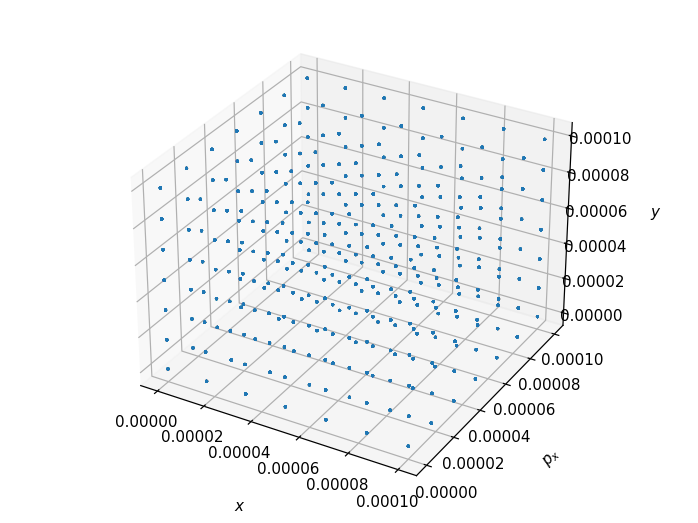

In [30]:
# read the data using SDDS class - see specific tutorial for more details
sddsp = SDDS(sif,"temp_particles_input.bin",0)
df = sddsp.readParticleData()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x,df.xp,df.y,s=1)

# labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p_x$')
ax.set_zlabel(r'$y$')

# padding
ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

plt.tight_layout()
plt.show()

### Hyperspheres

Shape: (5000, 6) - Number of paritcles: 5000 
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount
Warning - auto filename set
Changed from temp_particles_input.bin to temp_particles_input.bin.txt
Warning - auto filetype set
Changed from 0 to 1


<IPython.core.display.Javascript object>


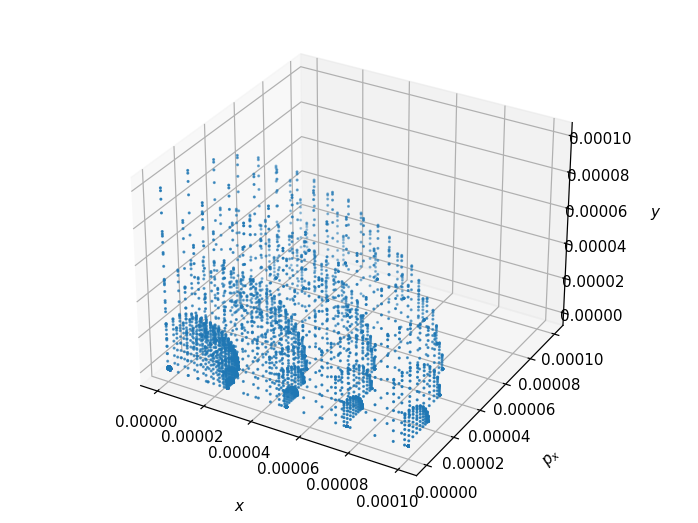

In [31]:
# generate rectangular coordinate input file - auto
# if pcentralmev is not given the energy value in er.kwargs will be used
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)
er.generate_sdds_particle_inputfile(grid_type='spherical',  
                                    dim=6,
                                    rmin=1e-6,
                                    rmax=1e-4,
                                    rsteps=5,
                                    phisteps=10,
                                    half=True, # False gives full spheres
                                    pcentralmev=er.kwargs.get('energy'),
                                   )

sddsp = SDDS(sif,"temp_particles_input.bin",0)
df = sddsp.readParticleData()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

ax.scatter(df.x,df.xp,df.y,s=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p_x$')
ax.set_zlabel(r'$y$')
plt.tight_layout()
plt.show()

Shape: (5000, 6) - Number of paritcles: 5000 
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount
Warning - auto filename set
Changed from temp_particles_input.bin to temp_particles_input.bin.txt
Warning - auto filetype set
Changed from 0 to 1


<IPython.core.display.Javascript object>


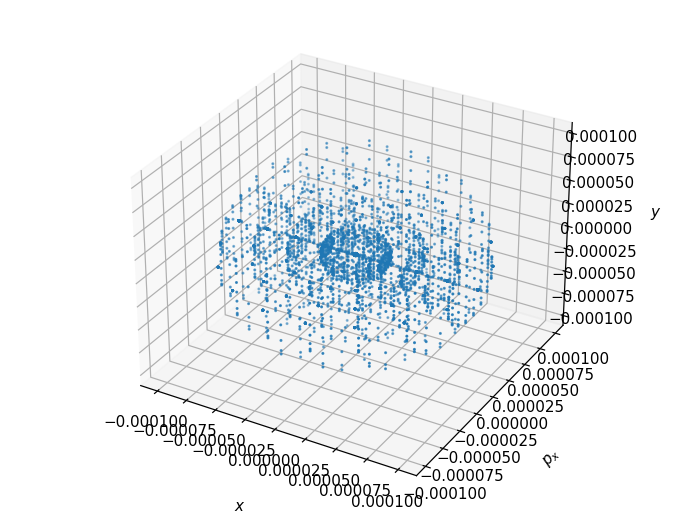

In [32]:
# generate rectangular coordinate input file - auto
# if pcentralmev is not given the energy value in er.kwargs will be used
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)
er.generate_sdds_particle_inputfile(grid_type='spherical',  
                                    dim=6,
                                    rmin=1e-6,
                                    rmax=1e-4,
                                    rsteps=5,
                                    phisteps=10,
                                    half=False, # False gives full spheres
                                    pcentralmev=er.kwargs.get('energy'),
                                   )

sddsp = SDDS(sif,"temp_particles_input.bin",0)
df = sddsp.readParticleData()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

ax.scatter(df.x,df.xp,df.y,s=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p_x$')
ax.set_zlabel(r'$y$')
plt.tight_layout()
plt.show()